### CARGA DE LIBRERIAS A UTILIZAR EN EL PROYECTO

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb



### CARGA DE LOS DATOS PARA MODELAR DESDE ARCHIVO CSV

In [227]:
df = pd.read_csv('E-Commerce_train.csv', sep = ';')

In [228]:
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


In [229]:
#Se renombra la columna a predecir como 'Target'
df.rename(columns={'Reached.on.Time_Y.N':'Target'},
               inplace=True)


In [230]:
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


In [231]:
df.info() #se observa la información general acerca del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Target               8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [232]:
df.shape

(8999, 12)

In [233]:
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Target


#### No se observan archivos nulos ni duplicados en Dataframe

### Se observa frecuencia de cada clase en las columnas categóricas

In [234]:
df.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [235]:
df.Mode_of_Shipment.value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [236]:
df.Customer_care_calls.value_counts()

4    2892
3    2743
5    1820
6     803
2     554
7     187
Name: Customer_care_calls, dtype: int64

In [237]:
df.Customer_rating.value_counts()

3    1836
1    1823
4    1802
5    1779
2    1759
Name: Customer_rating, dtype: int64

In [238]:
df.Prior_purchases.value_counts()

3     3347
2     2239
4     1752
5      863
6      402
10     152
7      126
8      118
Name: Prior_purchases, dtype: int64

In [239]:
df.Product_importance.value_counts()

low       4308
medium    3858
high       833
Name: Product_importance, dtype: int64

In [240]:
df.Gender.value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [241]:
df.Target.value_counts()

1    5719
0    3280
Name: Target, dtype: int64

### Se concluye que la Data NO presenta problemas de balance en variable a predecir y se decide seguir trabajando tal como está

### Observación gráfica de algunas variables categóricas

In [242]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

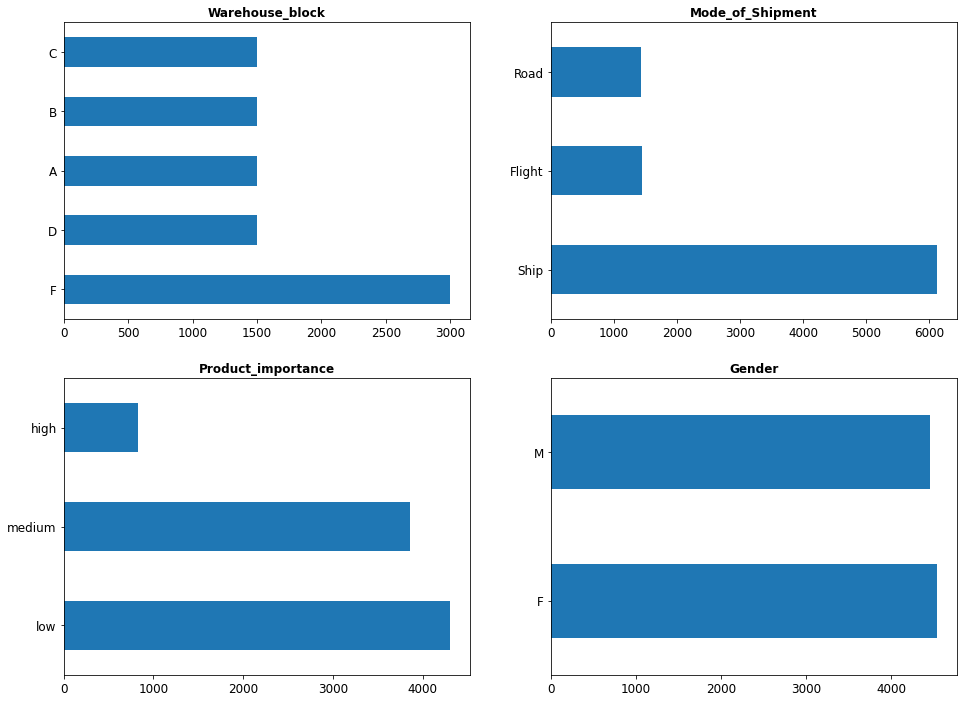

In [243]:
graficos_eda_categoricos(df.select_dtypes('O'))

### Observamos cantidades de clase 1 y clase 0 en categorias de variables Gender y Warehouse_block

In [244]:
df. groupby (['Gender', 'Target']).count()

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
Gender Target                                                                 
F      0       1661             1661              1661                 1661   
       1       2879             2879              2879                 2879   
M      0       1619             1619              1619                 1619   
       1       2840             2840              2840                 2840   

               Customer_rating  Cost_of_the_Product  Prior_purchases  \
Gender Target                                                          
F      0                  1661                 1661             1661   
       1                  2879                 2879             2879   
M      0                  1619                 1619             1619   
       1                  2840                 2840             2840   

               Product_importance  Discount_offered  Weight_in_gms  
Gender Target                                                       
F      0                     1661              1661           1661  
       1                     2879              2879           2879  
M      0                     1619              1619           1619  
       1                     2840              2840           2840

In [245]:
df. groupby (['Warehouse_block', 'Target']).count()

ID  Mode_of_Shipment  Customer_care_calls  \
Warehouse_block Target                                                
A               0        561               561                  561   
                1        939               939                  939   
B               0        536               536                  536   
                1        964               964                  964   
C               0        547               547                  547   
                1        953               953                  953   
D               0        541               541                  541   
                1        959               959                  959   
F               0       1095              1095                 1095   
                1       1904              1904                 1904   

                        Customer_rating  Cost_of_the_Product  Prior_purchases  \
Warehouse_block Target                                                          
A               0                   561                  561              561   
                1                   939                  939              939   
B               0                   536                  536              536   
                1                   964                  964              964   
C               0                   547                  547              547   
                1                   953                  953              953   
D               0                   541                  541              541   
                1                   959                  959              959   
F               0                  1095                 1095             1095   
                1                  1904                 1904             1904   

                        Product_importance  Gender  Discount_offered  \
Warehouse_block Target                                                 
A               0                      561     561               561   
                1                      939     939               939   
B               0                      536     536               536   
                1                      964     964               964   
C               0                      547     547               547   
                1                      953     953               953   
D               0                      541     541               541   
                1                      959     959               959   
F               0                     1095    1095              1095   
                1                     1904    1904              1904   

                        Weight_in_gms  
Warehouse_block Target                 
A               0                 561  
                1                 939  
B               0                 536  
                1                 964  
C               0                 547  
                1                 953  
D               0                 541  
                1                 959  
F               0                1095  
                1                1904

### Se observan proporciones similares entre clase 1 y clase 0 en las distintas categorías de las variables, por lo que no aportan demasiada información para el modelo y se eliminan

In [246]:
df=df.drop(['Gender'], axis=1)

In [247]:
df=df.drop(['Warehouse_block'], axis=1)

In [354]:
df.head(3)

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target
0,1,Flight,4,2,177,3,low,44,1233,1
1,2,Flight,4,5,216,2,low,59,3088,1
2,3,Flight,2,2,183,4,low,48,3374,1


## Observacion estadistica de variables numericas

In [249]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [250]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID,8999.0,4500.000000,4500.0,2597.931870,1.0,2250.5,4500.0,6749.5,8999.0
Customer_care_calls,8999.0,4.015113,4.0,1.138934,2.0,3.0,4.0,5.0,7.0
Customer_rating,8999.0,2.994999,3.0,1.413143,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,8999.0,208.561507,211.0,48.289172,96.0,168.0,211.0,249.5,310.0
Prior_purchases,8999.0,3.511501,3.0,1.532074,2.0,3.0,3.0,4.0,10.0
Discount_offered,8999.0,15.097678,8.0,17.400040,1.0,4.0,8.0,19.0,65.0
Weight_in_gms,8999.0,3584.364596,4046.0,1614.750194,1001.0,1857.0,4046.0,4999.5,7846.0
Target,8999.0,0.635515,1.0,0.481312,0.0,0.0,1.0,1.0,1.0


### Conclusiones:

* Variable Discount_offered presenta valores muy dispares entre la media y la mediana, por lo que se tendrá en observación.



In [251]:
df2=df.drop('ID', axis=1) #Se elimina del DataFrame columna ID, ya que no aporta información
df2.head(3)

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target
0,Flight,4,2,177,3,low,44,1233,1
1,Flight,4,5,216,2,low,59,3088,1
2,Flight,2,2,183,4,low,48,3374,1


In [252]:
df2.corr() # Se observa correlación de variable a predecir con las otras variables numéricas, para determinar importancia.

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target
Customer_care_calls,1.000000,0.012131,0.318109,0.164541,-0.128805,-0.237731,-0.072261
Customer_rating,0.012131,1.000000,0.009818,0.015606,-0.004315,-0.000227,0.011045
Cost_of_the_Product,0.318109,0.009818,1.000000,0.100637,-0.138259,-0.057113,-0.083470
Prior_purchases,0.164541,0.015606,0.100637,1.000000,-0.072634,-0.113060,-0.048269
Discount_offered,-0.128805,-0.004315,-0.138259,-0.072634,1.000000,-0.417782,0.416357
Weight_in_gms,-0.237731,-0.000227,-0.057113,-0.113060,-0.417782,1.000000,-0.326877
Target,-0.072261,0.011045,-0.083470,-0.048269,0.416357,-0.326877,1.000000


#### Variable Discount_offered presenta la correlación positiva más alta y variable Weight_in_gms presenta correlación negativa más alta, por lo que ambas serían de las más importantes para utilizar en el modelo que se implementará. Sin embargo, esta correlación es más bien debil.

### Se utiliza One Hot Encoder para cambiar variables categóricas a numéricas

#### 1. Para variable Customer_care_calls

In [253]:
from sklearn.preprocessing import OneHotEncoder

data_encoded = df2[['Customer_care_calls']]   #se toma variable Customer_care_calls
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray())

In [254]:
data_encoded.head(3)

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0


In [255]:
de1=data_encoded.rename({0: 'Dos', 1: 'Tres', 2: 'Cuatro', 3: 'Cinco', 4: 'Seis', 5: 'Siete'}, axis=1) #se renombran nuevas columnas

In [256]:
de1.head(3)

,Dos,Tres,Cuatro,Cinco,Seis,Siete
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0


In [257]:
# Incorporamos el dataframe codificado al dataframe original

df3 = df2.join(de1)

In [258]:
df3.head(3)

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete
0,Flight,4,2,177,3,low,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0
1,Flight,4,5,216,2,low,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0
2,Flight,2,2,183,4,low,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0


In [259]:
df3=df3.drop('Customer_care_calls', axis=1) #Se elimina columna correspondiente

#### 2. Para variable Mode_of_Shipment

In [260]:
data_encoded2 = df3[['Mode_of_Shipment']] # Se toma variable 'Mode_of_Shipment'
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded2 = pd.DataFrame(ohe.fit_transform(data_encoded2).toarray())

In [261]:
data_encoded2.head(3)

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


In [262]:
de2=data_encoded2.rename({0: 'Flight', 1: 'Road', 2: 'Ship'}, axis=1)

In [263]:
de2.head(3)

,Flight,Road,Ship
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


In [264]:
# Incorporamos el dataframe codificado al dataframe original

df4 = df3.join(de2)

In [265]:
df4.head(3)

,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,Road,Ship
0,Flight,2,177,3,low,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Flight,5,216,2,low,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Flight,2,183,4,low,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [266]:
df4=df4.drop('Mode_of_Shipment', axis=1) #se elimina columna correspondiente

In [267]:
df4.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,Road,Ship
0,2,177,3,low,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5,216,2,low,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,183,4,low,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### 3. Para variable Product_importance

In [268]:
data_encoded3 = df4[['Product_importance']] #se toma variable 'Product_importance'
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded3 = pd.DataFrame(ohe.fit_transform(data_encoded3).toarray())

In [269]:
data_encoded3.head(3)

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0


In [270]:
de3=data_encoded3.rename({0: 'High', 1: 'Low', 2: 'Medium'}, axis=1)

In [271]:
de3.head(3)

,High,Low,Medium
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0


In [272]:
# Incorporamos el dataframe codificado al dataframe original

df5 = df4.join(de3)

In [273]:
df5.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,Road,Ship,High,Low,Medium
0,2,177,3,low,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,216,2,low,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,183,4,low,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [274]:
df5=df5.drop('Product_importance', axis=1) #se elimina columna correspondiente

In [275]:
df5.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,Road,Ship,High,Low,Medium
0,2,177,3,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5,216,2,59,3088,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,183,4,48,3374,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### 4. Para variable Prior_purchases

In [276]:
data_encoded4 = df5[['Prior_purchases']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded4 = pd.DataFrame(ohe.fit_transform(data_encoded4).toarray())

In [277]:
data_encoded4.head(3)

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [278]:
de4=data_encoded4.rename({0: '2cp', 1: '3cp', 2: '4cp', 3: '5cp', 4: '6cp', 5: '7cp', 6: '8cp', 7: '9cp'}, axis=1)

In [279]:
de4.head(3)

,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [280]:
# Incorporamos el dataframe codificado al dataframe original

df6 = df5.join(de4)

In [281]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,2,177,3,44,1233,1,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,216,2,59,3088,1,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,183,4,48,3374,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [282]:
df6=df6.drop('Prior_purchases', axis=1) #se elimina columna correspondiente

In [283]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Target,Dos,Tres,Cuatro,Cinco,Seis,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,2,177,44,1233,1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,216,59,3088,1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,183,48,3374,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [284]:
#se realiza ordenamiento de columnas
df6 = df6[['Customer_rating','Cost_of_the_Product','Discount_offered','Weight_in_gms', 'Dos','Tres','Cuatro','Cinco','Seis','Siete', 'Flight','Road','Ship','High', 'Low','Medium', '2cp', '3cp', '4cp', '5cp', '6cp', '7cp', '8cp', '9cp','Target']]

In [285]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,177,44,1233,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,216,59,3088,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,183,48,3374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [286]:
df6.shape

(8999, 25)

In [287]:
df6.corr()

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
Customer_rating,1.000000,0.009818,-0.004315,-0.000227,0.003524,-0.018157,0.013549,-0.011531,0.019866,0.001067,...,0.011487,-0.012152,0.001259,0.005911,-0.002319,0.007237,-0.010287,0.003864,0.017551,0.011045
Cost_of_the_Product,0.009818,1.000000,-0.138259,-0.057113,-0.112320,-0.138013,-0.056197,0.046156,0.240210,0.208584,...,-0.018597,-0.081744,-0.144023,0.196268,0.093759,0.020256,-0.002443,-0.019305,-0.016097,-0.083470
Discount_offered,-0.004315,-0.138259,1.000000,-0.417782,0.048570,0.068748,0.001005,-0.014704,-0.097734,-0.070261,...,0.009255,0.059910,0.068755,-0.086845,-0.075597,-0.021248,0.023302,-0.006935,-0.000339,0.416357
Weight_in_gms,-0.000227,-0.057113,-0.417782,1.000000,-0.003158,0.121035,0.093114,-0.018079,-0.225391,-0.188757,...,0.042223,0.105675,0.141968,-0.155842,-0.199752,-0.031965,0.028767,0.035239,0.042202,-0.326877
Dos,0.003524,-0.112320,0.048570,-0.003158,1.000000,-0.169598,-0.176255,-0.128961,-0.080170,-0.037311,...,-0.021026,-0.011590,0.042998,-0.030191,-0.011192,0.007278,-0.006913,0.002990,-0.012046,0.027785
Tres,-0.018157,-0.138013,0.068748,0.121035,-0.169598,1.000000,-0.455669,-0.333402,-0.207263,-0.096460,...,0.032212,0.111971,0.094296,-0.117682,-0.147612,-0.055546,-0.000835,0.017045,0.044339,0.037007
Cuatro,0.013549,-0.056197,0.001005,0.093114,-0.176255,-0.455669,1.000000,-0.346489,-0.215398,-0.100246,...,0.001519,0.044283,0.060742,-0.109395,-0.027752,-0.000219,0.015204,0.000164,0.009513,0.001034
Cinco,-0.011531,0.046156,-0.014704,-0.018079,-0.128961,-0.333402,-0.346489,1.000000,-0.157602,-0.073348,...,0.000414,-0.038924,-0.040018,-0.041455,0.162036,0.050484,0.001218,-0.009399,-0.035941,0.000208
Seis,0.019866,0.240210,-0.097734,-0.225391,-0.080170,-0.207263,-0.215398,-0.157602,1.000000,-0.045597,...,-0.029346,-0.146779,-0.178770,0.337333,0.050295,0.028546,-0.010760,-0.008667,-0.016829,-0.073150
Siete,0.001067,0.208584,-0.070261,-0.188757,-0.037311,-0.096460,-0.100246,-0.073348,-0.045597,1.000000,...,-0.016008,-0.083837,-0.105654,0.231352,0.029278,-0.031501,-0.017359,-0.016792,-0.019094,-0.024022


In [288]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

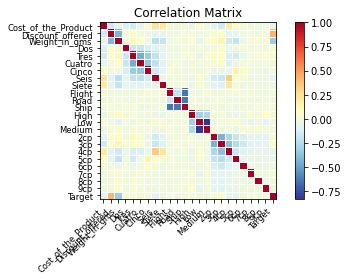

In [289]:
corr = df6.set_index('Customer_rating').corr() #Se observa correlación de todas las columnas
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

#### En matriz de correlación se observa lo mismo que antes de pasar columnas categóricas a numéricas

#### Se procede a estandarizar/normalizar columnas numericas, ya que los ordenes de magnitud son bastante diferentes y podrían influir en los resultados

In [290]:
from sklearn.preprocessing import StandardScaler

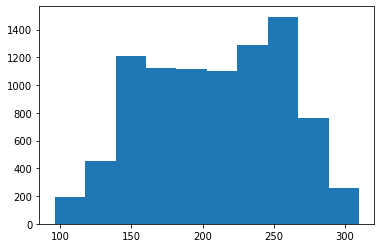

In [291]:
# Trabajaremos con la variable Cost_of_the_Product. Veamos su distribución

plt.hist(df6['Cost_of_the_Product']) 
plt.show()

In [292]:
# Escalamos

scaler = StandardScaler()

scaler.fit(df6[['Cost_of_the_Product']])

df6['Cost_of_the_Product'] = scaler.transform(df6[['Cost_of_the_Product']])

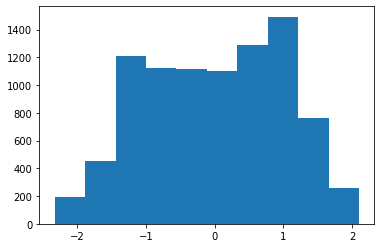

In [293]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(df6['Cost_of_the_Product']) 
plt.show()

In [294]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,44,1233,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,59,3088,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,48,3374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


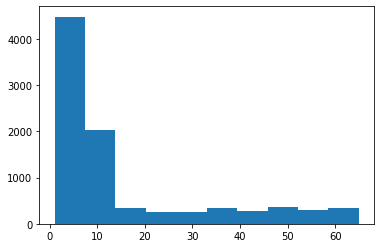

In [295]:
# Trabajaremos con la variable Discount_offered. Veamos su distribución

plt.hist(df6['Discount_offered']) 
plt.show()

In [296]:
# Escalamos

scaler = StandardScaler()

scaler.fit(df6[['Discount_offered']])

df6['Discount_offered'] = scaler.transform(df6[['Discount_offered']])

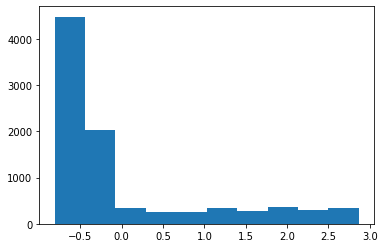

In [297]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(df6['Discount_offered']) 
plt.show()

In [298]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,1.661141,1233,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,2.523256,3088,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,1.891039,3374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


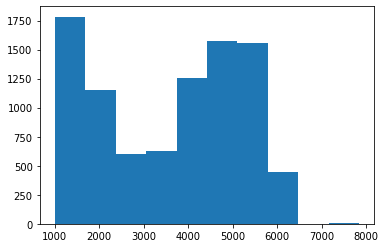

In [299]:
# Trabajaremos con la variable Weight_in_gms. Veamos su distribución

plt.hist(df6['Weight_in_gms']) 
plt.show()

In [300]:
# Escalamos

scaler = StandardScaler()

scaler.fit(df6[['Weight_in_gms']])

df6['Weight_in_gms'] = scaler.transform(df6[['Weight_in_gms']])

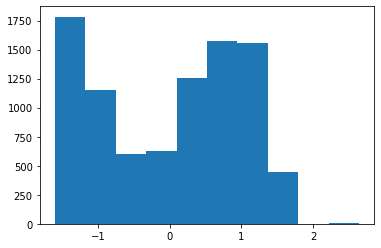

In [301]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(df6['Weight_in_gms']) 
plt.show()

In [302]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,1.661141,-1.456259,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,2.523256,-0.307411,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,1.891039,-0.130284,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [303]:
df6.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
0,2,-0.653630,1.661141,-1.456259,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.154049,2.523256,-0.307411,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,-0.529372,1.891039,-0.130284,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [304]:
df6.corr() #nueva comprobacion de correlacion de variables


,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp,Target
Customer_rating,1.000000,0.009818,-0.004315,-0.000227,0.003524,-0.018157,0.013549,-0.011531,0.019866,0.001067,...,0.011487,-0.012152,0.001259,0.005911,-0.002319,0.007237,-0.010287,0.003864,0.017551,0.011045
Cost_of_the_Product,0.009818,1.000000,-0.138259,-0.057113,-0.112320,-0.138013,-0.056197,0.046156,0.240210,0.208584,...,-0.018597,-0.081744,-0.144023,0.196268,0.093759,0.020256,-0.002443,-0.019305,-0.016097,-0.083470
Discount_offered,-0.004315,-0.138259,1.000000,-0.417782,0.048570,0.068748,0.001005,-0.014704,-0.097734,-0.070261,...,0.009255,0.059910,0.068755,-0.086845,-0.075597,-0.021248,0.023302,-0.006935,-0.000339,0.416357
Weight_in_gms,-0.000227,-0.057113,-0.417782,1.000000,-0.003158,0.121035,0.093114,-0.018079,-0.225391,-0.188757,...,0.042223,0.105675,0.141968,-0.155842,-0.199752,-0.031965,0.028767,0.035239,0.042202,-0.326877
Dos,0.003524,-0.112320,0.048570,-0.003158,1.000000,-0.169598,-0.176255,-0.128961,-0.080170,-0.037311,...,-0.021026,-0.011590,0.042998,-0.030191,-0.011192,0.007278,-0.006913,0.002990,-0.012046,0.027785
Tres,-0.018157,-0.138013,0.068748,0.121035,-0.169598,1.000000,-0.455669,-0.333402,-0.207263,-0.096460,...,0.032212,0.111971,0.094296,-0.117682,-0.147612,-0.055546,-0.000835,0.017045,0.044339,0.037007
Cuatro,0.013549,-0.056197,0.001005,0.093114,-0.176255,-0.455669,1.000000,-0.346489,-0.215398,-0.100246,...,0.001519,0.044283,0.060742,-0.109395,-0.027752,-0.000219,0.015204,0.000164,0.009513,0.001034
Cinco,-0.011531,0.046156,-0.014704,-0.018079,-0.128961,-0.333402,-0.346489,1.000000,-0.157602,-0.073348,...,0.000414,-0.038924,-0.040018,-0.041455,0.162036,0.050484,0.001218,-0.009399,-0.035941,0.000208
Seis,0.019866,0.240210,-0.097734,-0.225391,-0.080170,-0.207263,-0.215398,-0.157602,1.000000,-0.045597,...,-0.029346,-0.146779,-0.178770,0.337333,0.050295,0.028546,-0.010760,-0.008667,-0.016829,-0.073150
Siete,0.001067,0.208584,-0.070261,-0.188757,-0.037311,-0.096460,-0.100246,-0.073348,-0.045597,1.000000,...,-0.016008,-0.083837,-0.105654,0.231352,0.029278,-0.031501,-0.017359,-0.016792,-0.019094,-0.024022


### Visualización archivo E-Commerce_test

In [305]:
df_test = pd.read_csv('E-Commerce_test.csv', sep = ';')

In [306]:
df_test.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739


In [307]:
df_test.info() #se observa la información general acerca del dataframe para predicción

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2000 non-null   int64 
 1   Warehouse_block      2000 non-null   object
 2   Mode_of_Shipment     2000 non-null   object
 3   Customer_care_calls  2000 non-null   int64 
 4   Customer_rating      2000 non-null   int64 
 5   Cost_of_the_Product  2000 non-null   int64 
 6   Prior_purchases      2000 non-null   int64 
 7   Product_importance   2000 non-null   object
 8   Gender               2000 non-null   object
 9   Discount_offered     2000 non-null   int64 
 10  Weight_in_gms        2000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.0+ KB


In [308]:
df_test[df_test.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms


#### No se observan datos nulos ni registros duplicados

### Se observa frecuencia de cada clase en las columnas categóricas

In [309]:
df_test.Warehouse_block.value_counts()

F    667
D    334
A    333
B    333
C    333
Name: Warehouse_block, dtype: int64

In [310]:
df_test.Mode_of_Shipment.value_counts()

Ship      1340
Road       330
Flight     330
Name: Mode_of_Shipment, dtype: int64

In [311]:
df_test.Customer_care_calls.value_counts()

4    665
5    508
3    474
6    210
2     84
7     59
Name: Customer_care_calls, dtype: int64

In [312]:
df_test.Customer_rating.value_counts()

1    412
2    406
3    403
5    392
4    387
Name: Customer_rating, dtype: int64

In [313]:
df_test.Prior_purchases.value_counts()

3     608
5     424
4     403
2     360
6     159
10     26
7      10
8      10
Name: Prior_purchases, dtype: int64

In [314]:
df_test.Product_importance.value_counts()

low       989
medium    896
high      115
Name: Product_importance, dtype: int64

In [315]:
df_test.Gender.value_counts()

F    1005
M     995
Name: Gender, dtype: int64

#### Conclusión: las variables analizadas presentan un comportamiento muy similar a las del archivo E-Commerce_train

### Observamos distribución de variables numéricas

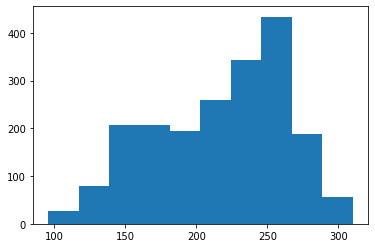

In [316]:
# 1. Variable Cost_of_the_Product.

plt.hist(df_test['Cost_of_the_Product']) 
plt.show()

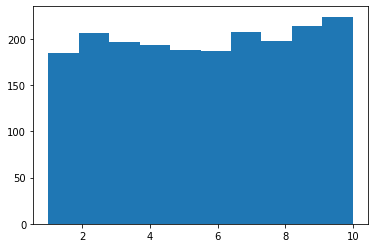

In [317]:
# 2 Variable Discount_offered. 

plt.hist(df_test['Discount_offered']) 
plt.show()

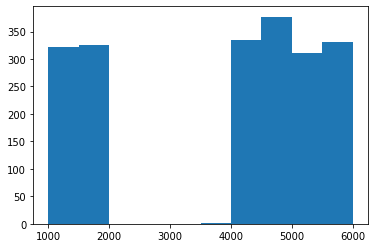

In [318]:
# 3 Variable Weight_in_gms.

plt.hist(df_test['Weight_in_gms']) 
plt.show()

##### Conclusión: se observa que la variable 'Discount_offered', posee un rango muy acotado, solo entre 0% y 10%, a diferencia de esta variable en archivo E-Commerce_train, en la cual los valores van desde 0% hasta 60%. Se tendrá en cuenta esta diferencia al momento de evaluar los diferentes modelos a plantear.

### DISEÑO DE LA MODELIZACIÓN

#### 1. Modelo de Regresión Logistica

#### Como estamos ante un problema de clasificación, utilizaremos un modelo de los más sencillos como la regresión logística y según los resultados abordaremos algún otro modelo más complejo.

#### Separación de variables predictoras y target

In [357]:
df6.head(4)

,Customer_rating,Cost_of_the_Product,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,Flight,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,2,-0.653630,-1.456259,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.154049,-0.307411,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,-0.529372,-0.130284,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,-0.674340,-1.490942,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [320]:
x = df6.drop(['Target'], axis=1)
y = df6['Target']

#### Separación de data para train y test

In [321]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=10) 

In [322]:
train_x.shape

(6299, 24)

### ENTRENAMIENTO DEL MODELO SOBRE DATA DE TRAIN

In [323]:
#Definicion del modelo a utilizar
model = linear_model.LogisticRegression()


#Entrenamiento del modelo
model.fit(train_x,train_y)

LogisticRegression()

### PREDICCIÓN Y VALIDACIÓN SOBRE DATOS DE TEST ARCHIVO TRAIN

In [324]:
y_pred = model.predict(test_x)

In [325]:
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [326]:
# Evaluación 2
from sklearn.metrics import recall_score

#recall_score(yt,yp, average='macro')
recall_score(test_y,y_pred)

0.7511792452830188

In [327]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1004
           1       0.74      0.75      0.74      1696

    accuracy                           0.68      2700
   macro avg       0.65      0.65      0.65      2700
weighted avg       0.67      0.68      0.68      2700



### PREDICCIÓN SOBRE DATOS DE ARCHIVO TEST 

##### Se debe mencionar que previamente el archivo E-Commerce_test.csv, fue tratado para tenerlo en el mismo formato y tipos y números de columnas que el archivo E-Commerce_train.csv, generándose archivo test1.csv

In [328]:
df10 = pd.read_csv('test1.csv', sep = ',')

In [329]:
df10.head(3)

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,1,-0.616410,1.510350,0.814459,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,-1.458294,1.165993,0.344728,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.378956,-0.900149,1.102038,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [330]:
x_artest = df10

In [331]:
x_artest

,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Dos,Tres,Cuatro,Cinco,Seis,Siete,...,Low,Medium,2cp,3cp,4cp,5cp,6cp,7cp,8cp,9cp
0,1,-0.616410,1.510350,0.814459,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,-1.458294,1.165993,0.344728,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.378956,-0.900149,1.102038,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-1.825269,-1.588863,0.460111,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.916250,-0.555792,0.964399,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.743556,-1.588863,-1.358489,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1996,1,0.311821,0.132922,-1.528928,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1997,4,0.527688,-0.555792,-1.582812,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1998,2,0.117540,-1.244506,-1.550599,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [332]:
y_artest = model.predict(x_artest)

In [333]:
y_artest

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [334]:
arfinal=pd.DataFrame(y_artest)

In [335]:
arfinal.value_counts()

1    1348
0     652
dtype: int64

In [336]:
arfinal.head(3)

,0
0,1
1,1
2,0


In [337]:
arfinal2=arfinal.rename({0: 'pred'}, axis=1)

In [338]:
arfinal2.head(3)

,pred
0,1
1,1
2,0


In [339]:
arfinal2.to_csv('CAAM1972.csv', index=False)

#### Con este modelo inicial de Regresión Logistica se realizan varias iteraciones, usando desde una columna, hasta todas las columnas, no lográndose buenos resultados, por lo que se procede a buscar otros modelos para afrontar el problema.

#### 2. Modelo Arbol de Decisión Clasificación

In [340]:
from sklearn.tree import DecisionTreeClassifier

# Se instancia modelo
ac = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Se entrena modelo
ac.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [341]:
y_pred = ac.predict(test_x) #se hace predicción con modelo

In [342]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [343]:
#recall_score(yt,yp, average='macro')
recall_score(test_y,y_pred)

0.5819575471698113

In [344]:
print(classification_report(test_y, y_pred)) #Se obtienen metricas del modelo implementado

              precision    recall  f1-score   support

           0       0.58      0.96      0.72      1004
           1       0.96      0.58      0.72      1696

    accuracy                           0.72      2700
   macro avg       0.77      0.77      0.72      2700
weighted avg       0.82      0.72      0.72      2700



#### Se prodede a obtener predicción del modelo y archivo final con estas

In [345]:
y_artest2 = ac.predict(x_artest)

In [346]:
y_artest2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [347]:
arfinal3=pd.DataFrame(y_artest2)

In [348]:
arfinal3.head(3)

,0
0,1
1,1
2,0


In [349]:
arfinal3.value_counts()

1    1367
0     633
dtype: int64

In [350]:
arfinal4=arfinal3.rename({0: 'pred'}, axis=1)

In [351]:
arfinal4.to_csv('CAAM1972.csv', index=False)

#### Se realizan diversas iteraciones con este modelo, no obteniéndose valores buenos para metrica recall

#### 3.Modelo Máquina Soporte Vectorial Clasificación

In [356]:
x = df6.drop(['Discount_offered', 'Target'], axis = 'columns', inplace=True)
y = df6['Target']

KeyError: "['Discount_offered', 'Target'] not found in axis"